In [14]:
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('./../ADP_모의고사/data/Cars93.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i


In [16]:
df.columns = df.columns.str.replace('.', '')

In [17]:
formula = 'Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway'
model = smf.ols(formula, data=df).fit()

In [ ]:
'''
Adj.R-squared: 0.542

MPGcity p-value: 0.44
MPGhighway p-value: 0.9
'''
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           4.88e-14
Time:                        09:46:37   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.0

In [19]:
'''
'MPGcity', 'MPGhighway'의 상관관계가 0.9 이상으로 매우 높다.
'''
df[['Price', 'EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']].corr()

,Price,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
Price,1.000000,0.597425,-0.004955,0.647179,0.503628,-0.594562,-0.560680
EngineSize,0.597425,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.004955,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.647179,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.503628,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.594562,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.560680,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [ ]:
from patsy import dmatrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
formula = 'EngineSize + RPM + Weight + Length + MPGcity + MPGhighway'
X = dmatrix(formula, df, return_type='dataframe')
vif_list = []

for i in range(1, X.shape[1]):
    vif = variance_inflation_factor(X.values, i)
    vif_list.append((vif, X.columns[i]))
vif_df = pd.DataFrame(vif_list, columns=['VIF', 'Variable'])
vif_df

,VIF,Variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [30]:
'''
VIF가 10 이상이고, 가장 큰 MPGcity 제거
'''
formula = 'Price ~ EngineSize + RPM + Weight + Length + MPGhighway'
model = smf.ols(formula, data=df).fit()

In [ ]:
'''
Adj.R-squared: 0.544

MPGhighway p-value: 28
'''
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.28e-14
Time:                        09:50:51   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8122     17.158     -2.087      0.0

In [36]:
y_pred = model.predict(X)
y = df['Price']

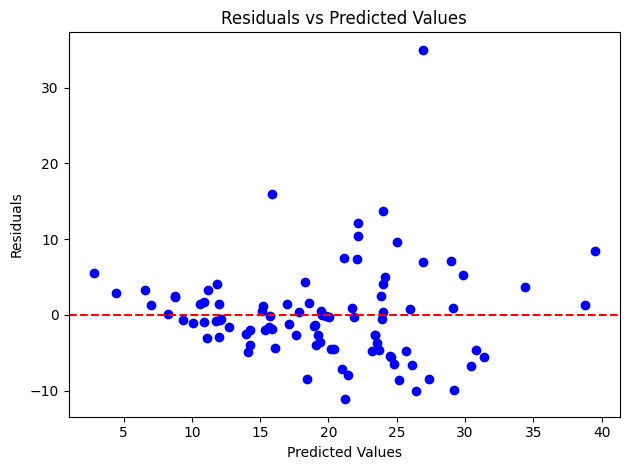

In [38]:
residuals = y - y_pred
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.tight_layout()
plt.show()

In [35]:
# 예시 데이터 (X는 DataFrame 또는 ndarray여야 함)
X_with_const = sm.add_constant(X)  # 상수항 추가
residuals = y - model.predict(X)

# Breusch-Pagan 검정
statistic, p_value, f_statistic, f_p_value = het_breuschpagan(residuals, X_with_const)

H0 = '잔차의 분산이 일정하다'  # 귀무가설
H1 = '잔차의 분산이 일정하지 않다'  # 대립가설

print(f'Breusch-Pagan 검정 통계량: {statistic}')
print(f'Breusch-Pagan 검정 p-value: {p_value}')

if p_value < 0.05:
    print(f'귀무가설 기각: {H1}')
else:
    print(f'귀무가설 채택: {H0}')

Breusch-Pagan 검정 통계량: 3.7810056230435416
Breusch-Pagan 검정 p-value: 0.7062836602154028
귀무가설 채택: 잔차의 분산이 일정하다
